Aluno: Jean Antonio Ribeiro<br>
RA: 265739
<br><br>
Aluna: Kellen Natalice Vilharva<br>
RA: 235493

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import mean
from numpy import std
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn import linear_model
#from google.colab import drive

#drive.mount('/content/drive')

# Funções

In [3]:
# https://anello92.medium.com/matriz-de-confus%C3%A3o-e-como-implement%C3%A1-la-em-python-c99d62c9c11b

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

def Metricas(y_test, y_pred):
  print(accuracy_score(y_test, y_pred))
  print(recall_score(y_test, y_pred, average=None))
  print(precision_score(y_test, y_pred, average=None))


from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

def F1(y_true, y_pred):
  # Method 1: sklearn  
  f1_score(y_true, y_pred, average=None)
  
  # Method 2: Manual Calculation
  F1 = 2 * (precision * recall) / (precision + recall)
  
  # Method 3: Classification report [BONUS]
  print(classification_report(y_true, y_pred, target_names=target_names))

def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0

# Leitura dos dados

In [4]:
!git clone https://github.com/JeanKusanagi/Ciencia-e-Visualizacao-de-Dados-em-Saude/

Cloning into 'Ciencia-e-Visualizacao-de-Dados-em-Saude'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (390/390), done.
remote: Compressing objects: 100% (282/282), done.
remote: Total 390 (delta 93), reused 376 (delta 85), pack-reused 0
Receiving objects: 100% (390/390), 3.45 MiB | 12.22 MiB/s, done.
Resolving deltas: 100% (93/93), done.


# Análise 1 - Teste de Hipóteses

Existe uma correlação forte entre weight com sp é 0.92 e de gbc com gs e pbc são respectivamente são 0.96 e 0.82.

Por sua vez, existe uma correlação fraca entre quase todas as outras variáveis. Por exemplo, a correlação entre weght e sp é 0.023.

In [21]:
df = pd.read_csv("/content/Ciencia-e-Visualizacao-de-Dados-em-Saude/DataSet/home-master/data/zombie/raw/zombies-survey.csv")
#df_meals = pd.read_csv("/content/Ciencia-e-Visualizacao-de-Dados-em-Saude/DataSet/home-master/data/zombie/raw/zombie-meals.csv")
df.head()

,name,type,gender,height,weight,gbc,gs,pbc,sp
0,Lossack Slossir,biological,male,73.847017,241.893563,0.8,14,5.1,3.5
1,Hasp Talch,biological,male,68.781904,162.310473,0.8,14,4.9,3.0
2,Lesprash Rindrad,biological,male,74.110105,212.740856,0.8,13,4.7,3.2
3,Halceff Gock,biological,male,71.730978,220.042470,0.8,15,4.6,3.1
4,Moddeche Splud,biological,male,69.881796,206.349801,0.8,14,5.0,3.6


In [ ]:
print('Grandezas Estatíticas do Dataset')
print('\n')
print(df.describe())

Grandezas Estatíticas do Dataset


           height      weight         gbc          gs         pbc          sp
count  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000
mean    66.257864  159.677084    4.794667   37.586667    5.843333    3.054000
std      3.936123   33.072334    3.052643   17.644204    0.828066    0.433594
min     56.159458   84.872124    0.400000   10.000000    4.300000    2.000000
25%     63.401111  135.014585    1.200000   16.000000    5.100000    2.800000
50%     66.280566  158.118080    5.200000   43.500000    5.800000    3.000000
75%     69.157301  186.321615    7.200000   51.000000    6.400000    3.300000
max     75.205974  241.893563   10.000000   69.000000    7.900000    4.400000


In [ ]:
#pd.plotting.scatter_matrix(df,figsize=(20,20), marker='o', grid=True, range_padding=1, alpha=0.5)

In [ ]:
#Histogram
f, axs = plt.subplots(5, 4,figsize=(20,10))
for i,col in enumerate(df.columns[:8]):
    plt.subplot(2, 4, i+1)
    sns.histplot(df,x=col,hue='sp')
    plt.title(col)
    plt.xlabel('')

## Correlação

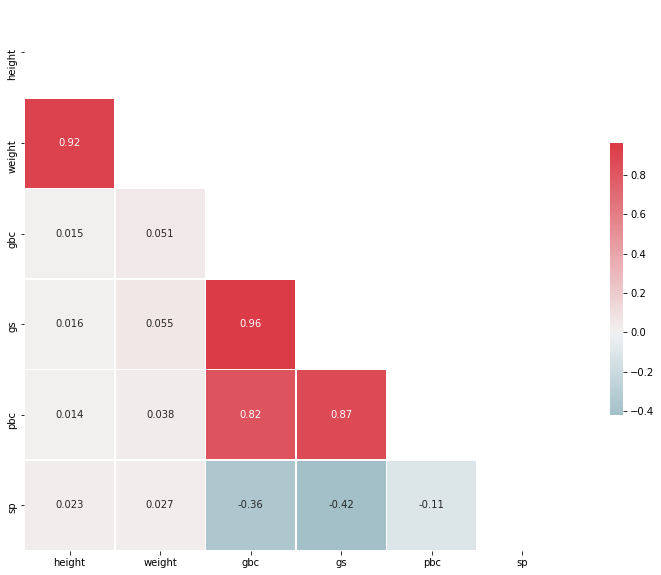

In [ ]:
import seaborn as sns

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5});

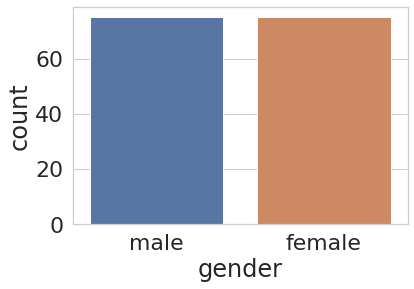

In [ ]:
# cria um gráfico de barras com a frequência da gender
sns.countplot(x="gender", data=df)

#mostra o gráfico
plt.show()

## height e gender

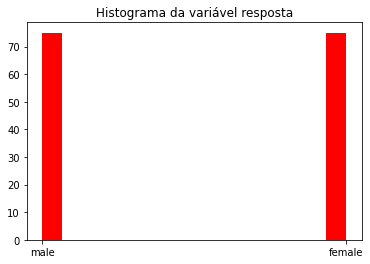

In [ ]:
y = df['gender']

# Elabora um histograma
plt.hist(y, color='red', bins=15)
plt.title('Histograma da variável resposta')
plt.show()

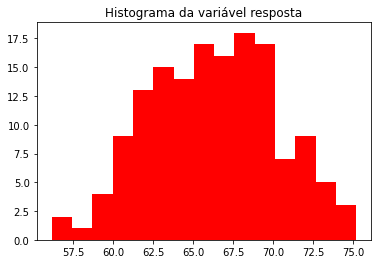

In [ ]:
y = df['height']

# Elabora um histograma
plt.hist(y, color='red', bins=15)
plt.title('Histograma da variável resposta')
plt.show()

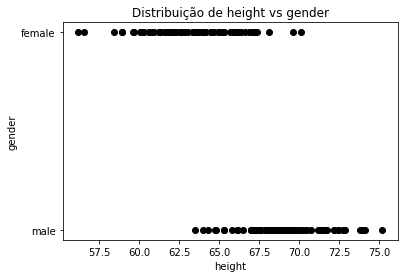

In [ ]:
plt.scatter(df['height'], df['gender'], color='black')
plt.title("Distribuição de height vs gender")
plt.xlabel("height")
plt.ylabel("gender")
plt.show()

Menor valor de height:  56.1594580191187
Maior valor de height:  75.20597361422121
Menor valor de gender:  1
Maior valor de gender:  1
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


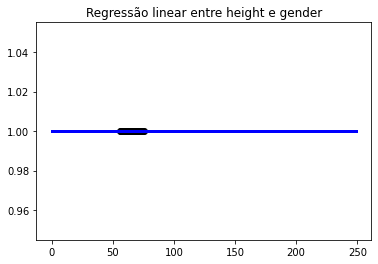

In [ ]:
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0

for index, row in df.iterrows():
  #print(row['gender'])
  df['genero'] = transformar_sexo(row['gender'])
  #print(df['genero'])

print('Menor valor de height: ', df['height'].min())
print('Maior valor de height: ', df['height'].max())

print('Menor valor de gender: ', df['genero'].min())
print('Maior valor de gender: ', df['genero'].max())

# Create linear regression object
regr = linear_model.LinearRegression()

x=np.asarray(df['height']).reshape(-1,1)
y=np.asarray(df['genero']).reshape(-1,1)

regr.fit(x,y)
print(regr)
new_input=np.asarray(range(250)).reshape(-1,1)
predicted_output=regr.predict(new_input)

plt.scatter(df['height'],df['genero'],  color='black')
plt.title("Regressão linear entre height e gender")
plt.plot(new_input, predicted_output, color='blue', linewidth=3)
plt.show()

In [ ]:
print('Grandezas Estatíticas do Dataset')
print('\n')
print(df.describe())

Grandezas Estatíticas do Dataset


           height      weight         gbc  ...         pbc          sp  genero
count  150.000000  150.000000  150.000000  ...  150.000000  150.000000   150.0
mean    66.257864  159.677084    4.794667  ...    5.843333    3.054000     1.0
std      3.936123   33.072334    3.052643  ...    0.828066    0.433594     0.0
min     56.159458   84.872124    0.400000  ...    4.300000    2.000000     1.0
25%     63.401111  135.014585    1.200000  ...    5.100000    2.800000     1.0
50%     66.280566  158.118080    5.200000  ...    5.800000    3.000000     1.0
75%     69.157301  186.321615    7.200000  ...    6.400000    3.300000     1.0
max     75.205974  241.893563   10.000000  ...    7.900000    4.400000     1.0

[8 rows x 7 columns]


In [ ]:
df.query('gender=="female"').head(5)

,name,type,gender,height,weight,gbc,gs,pbc,sp,genero
25,Allay Derrusp,biological,female,58.910732,102.088326,0.8,16,5.0,3.0,1
26,Asp Thelk,biological,female,65.230013,141.305823,1.6,16,5.0,3.4,1
27,Hagg Fobbar,biological,female,63.369004,131.041403,0.8,15,5.2,3.5,1
28,Aisp Natroth,biological,female,64.479997,128.171511,0.8,14,5.2,3.4,1
29,Veck Ackot,biological,female,61.793096,129.781407,0.8,16,4.7,3.2,1


In [ ]:
df.groupby(by='gender').size()

gender
female    75
male      75
dtype: int64

In [ ]:
df.groupby(by='gender')['height'].mean()

gender
female    63.374851
male      69.140878
Name: height, dtype: float64

In [ ]:
df.count()

name      150
type      150
gender    150
height    150
weight    150
gbc       150
gs        150
pbc       150
sp        150
genero    150
dtype: int64

In [30]:
df['weight']=pd.to_numeric(df['weight'],errors='coerce',downcast='float')
df['height']=pd.to_numeric(df['height'],errors='coerce',downcast='float')
df['gbc']=pd.to_numeric(df['gbc'],errors='coerce',downcast='float')
df['gs']=pd.to_numeric(df['gs'],errors='coerce',downcast='float')
df['pbc']=pd.to_numeric(df['pbc'],errors='coerce',downcast='float')
df['sp']=pd.to_numeric(df['sp'],errors='coerce',downcast='float')

print ('Médias das Amostras')
m1= df.groupby('height').mean()
print (m1)

#print ('Desvio Padrão das Amostras')
#sd1 = df.groupby('height').std()
#print (sd1)

Médias das Amostras
               weight  gbc  gs  pbc   sp
height                                  
56.159458   90.815254  7.2  51  5.9  3.0
56.547974   84.872124  5.6  48  6.8  2.8
58.438248   98.192619  0.8  15  5.1  3.4
58.895885  101.682610  0.8  13  4.4  3.0
58.910732  102.088326  0.8  16  5.0  3.0
...               ...  ...  ..  ...  ...
73.818535  195.290619  8.4  55  6.8  3.0
73.847015  241.893570  0.8  14  5.1  3.5
74.033806  212.910233  6.4  47  6.3  3.3
74.110107  212.740860  0.8  13  4.7  3.2
75.205971  228.761780  2.0  17  5.1  3.3

[150 rows x 5 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b19e77d50>,
      dtype=object)

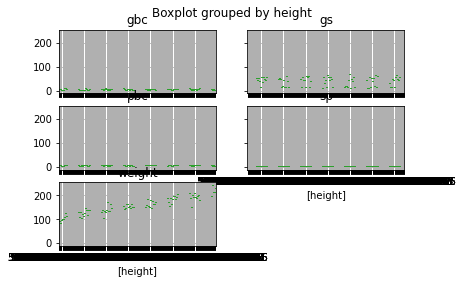

In [35]:
# Create the boxplot
df.boxplot(by='height')

## weight e height

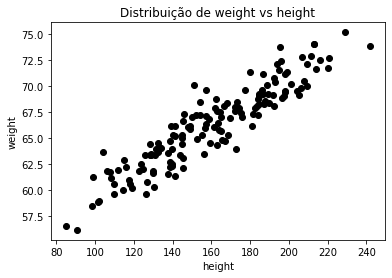

In [ ]:
plt.scatter(df['weight'],df['height'],  color='black')
plt.title("Distribuição de weight vs height")
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

Menor valor de height:  56.1594580191187
Maior valor de height:  75.20597361422121
Menor valor de weight:  84.8721236452797
Maior valor de weight:  241.893563180437
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


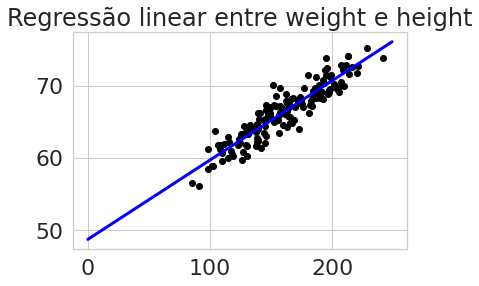

In [ ]:
print('Menor valor de height: ', df['height'].min())
print('Maior valor de height: ', df['height'].max())

print('Menor valor de weight: ', df['weight'].min())
print('Maior valor de weight: ', df['weight'].max())

# Create linear regression object
regr = linear_model.LinearRegression()

x=np.asarray(df['weight']).reshape(-1,1)
y=np.asarray(df['height']).reshape(-1,1)

regr.fit(x,y)
print(regr)
new_input=np.asarray(range(250)).reshape(-1,1)
predicted_output=regr.predict(new_input)

plt.scatter(df['weight'],df['height'],  color='black')
plt.title("Regressão linear entre weight e height")
plt.plot(new_input, predicted_output, color='blue', linewidth=3)
plt.show()

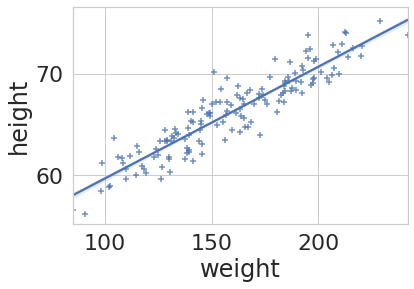

In [ ]:
import seaborn as sns
import pandas as pd

x = pd.Series(df['weight'], name="weight")
y = pd.Series(df['height'],name="height")
ax = sns.regplot(x=x, y=y, marker="+",ci=70)

# Análise 2 - Regressão Linear: zombie-meals.csv

In [ ]:
# https://www.kaggle.com/marilivb/4-regress-o-linear

In [47]:
df = pd.read_csv("/content/Ciencia-e-Visualizacao-de-Dados-em-Saude/DataSet/home-master/data/zombie/raw/zombie-meals.csv")
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cuts,rating
0,Oven-Grilled Silver Gerbil,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,Thermal-Cooked Chaos Seal,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,Oven-Baked Phase Ferret,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,Simmered Nightmare Havanese,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Ethereal Watercress Soufflé,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [51]:
print ('Médias das Amostras')
m1= df.groupby('rating').mean()
print (m1)

#print ('Desvio Padrão das Amostras')
#sd1 = df.groupby('rating').std()
#print (sd1)

Médias das Amostras
           calories  protein  fat  sodium  ...  vitamins  shelf  weight  cuts
rating                                     ...                               
18.042851       120        1    2     220  ...        25      2    1.00  0.75
19.823573       120        1    3     210  ...        25      2    1.00  0.75
21.871292       120        1    2     220  ...        25      2    1.00  1.00
22.396513       110        1    1     180  ...        25      2    1.00  1.00
22.736446       110        1    1     180  ...        25      2    1.00  1.00
...             ...      ...  ...     ...  ...       ...    ...     ...   ...
68.235885        80        2    0       0  ...         0      1    0.83  1.00
68.402973        70        4    1     130  ...        25      3    1.00  0.33
72.801787        90        3    0       0  ...         0      1    1.00  0.67
74.472949        90        3    0       0  ...         0      1    1.00  0.67
93.704912        50        4    0     140  .

## Correlação

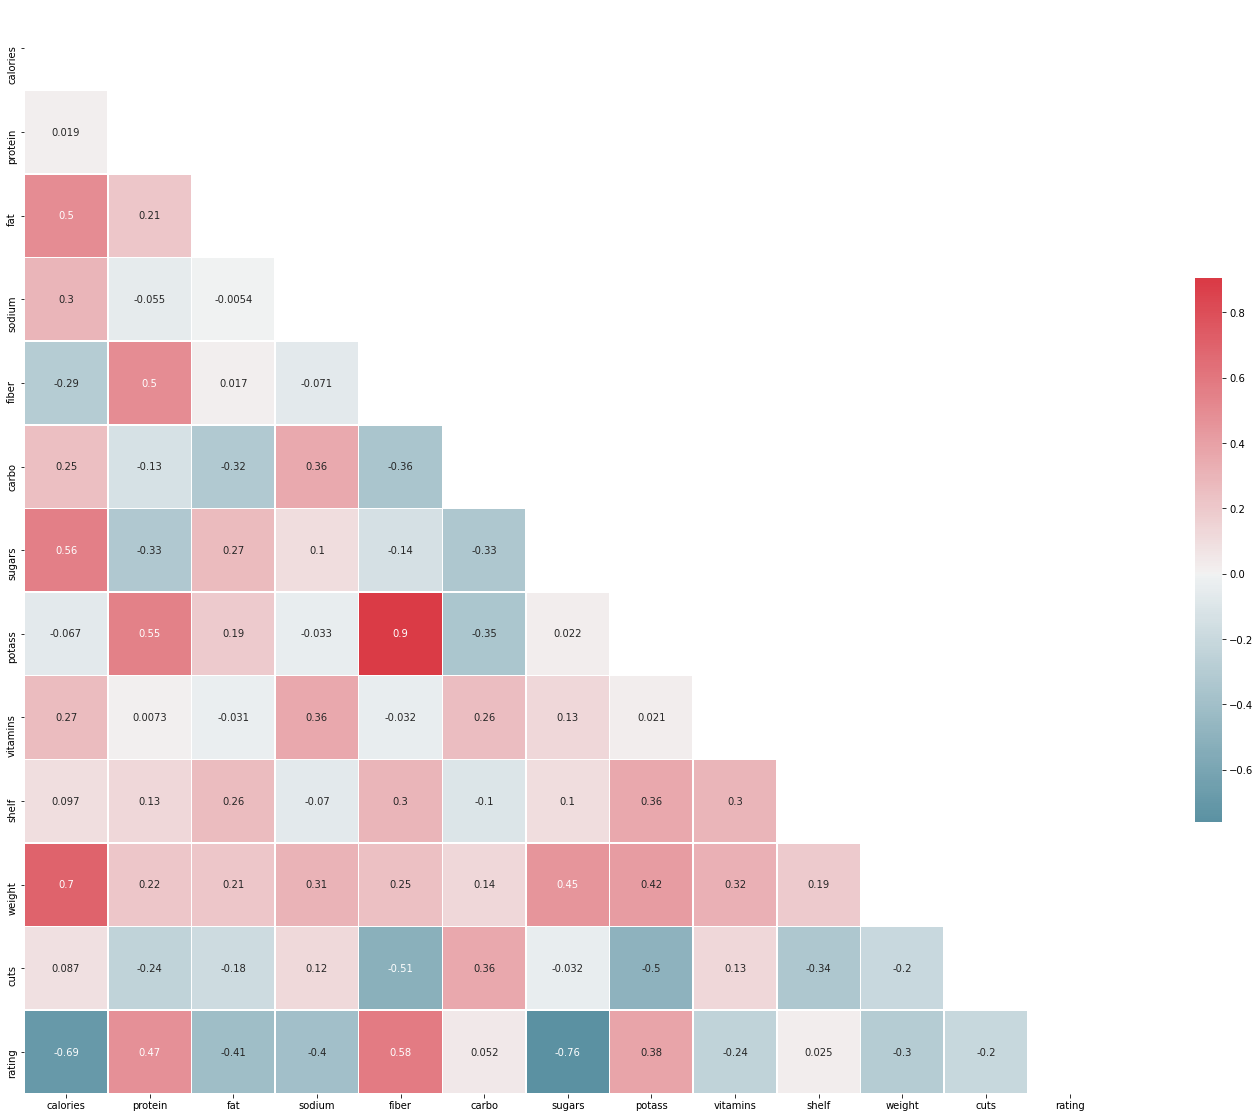

In [ ]:
import seaborn as sns

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [ ]:
print("Estatísticas descritivas de y:")
df['rating'].describe()

Estatísticas descritivas de y:


count    77.000000
mean     42.665705
std      14.047289
min      18.042851
25%      33.174094
50%      40.400208
75%      50.828392
max      93.704912
Name: rating, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc469a98a10>,
      dtype=object)

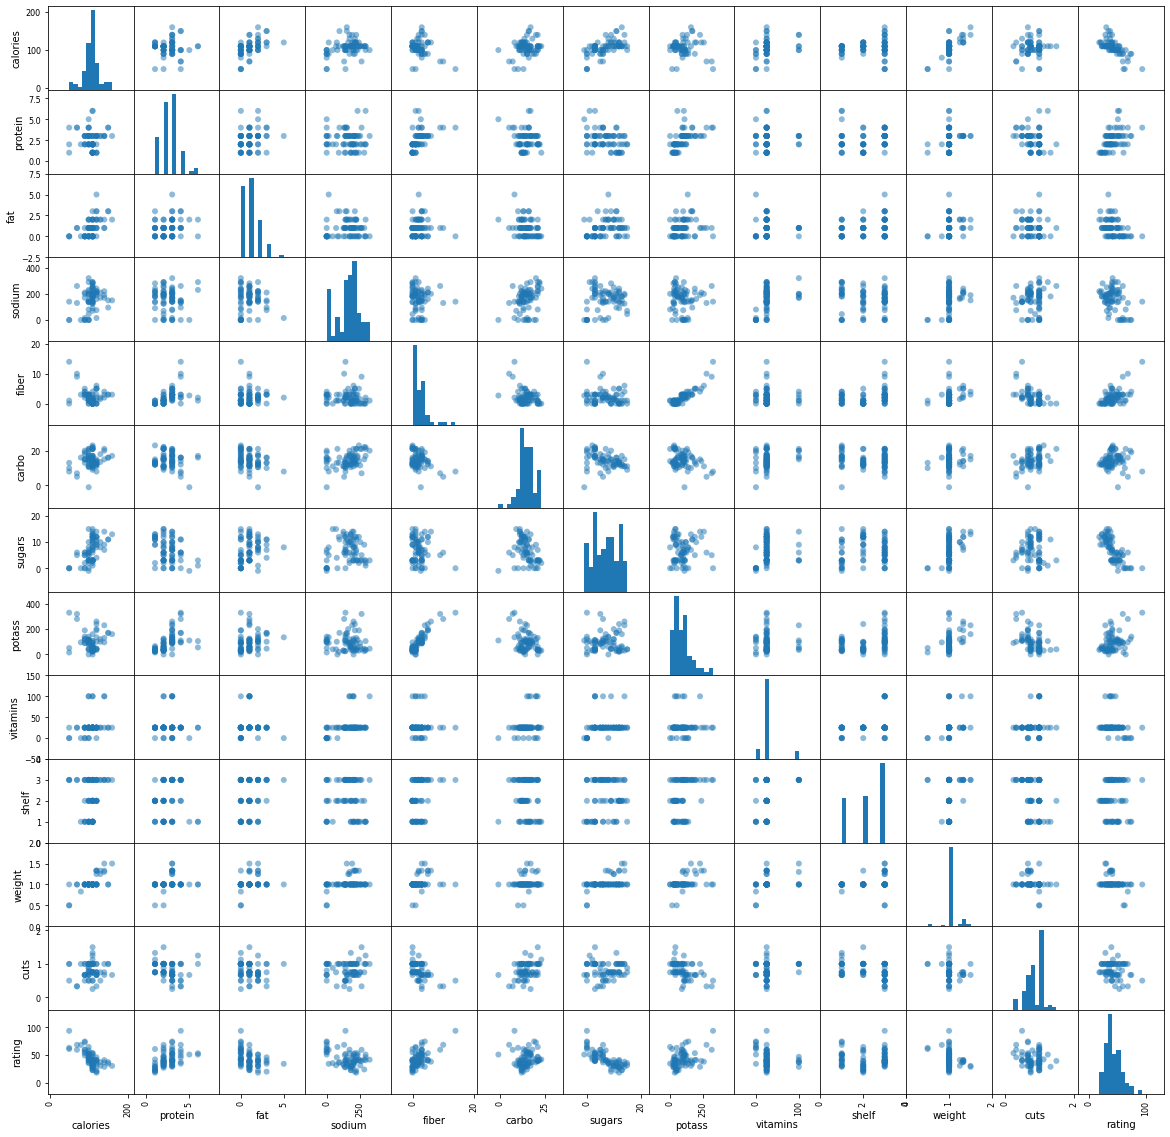

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(20,20), marker='o', grid=True, range_padding=1, alpha=0.5)

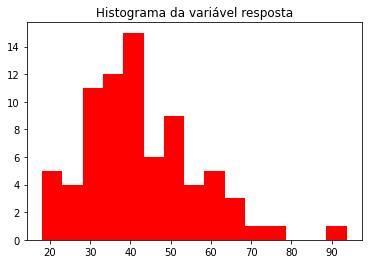

In [ ]:
y = df['rating']

# Elabora um histograma
plt.hist(y, color='red', bins=15)
plt.title('Histograma da variável resposta')
plt.show()

Menor valor de calories:  50
Maior valor de calories:  160
Menor valor de rating:  18.042851000000002
Maior valor de rating:  93.704912
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


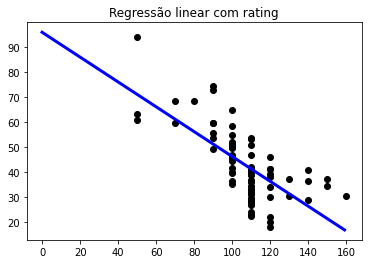

In [ ]:
print('Menor valor de calories: ', df['calories'].min())
print('Maior valor de calories: ', df['calories'].max())
print('Menor valor de rating: ', df['rating'].min())
print('Maior valor de rating: ', df['rating'].max())

max = int(df['calories'].max())

# Create linear regression object
regr = linear_model.LinearRegression()

x=np.asarray(df['calories']).reshape(-1,1)
y=np.asarray(df['rating']).reshape(-1,1)

regr.fit(x,y)
print(regr)

new_input=np.asarray(range(max)).reshape(-1,1)
predicted_output=regr.predict(new_input)

plt.scatter(df['calories'],df_meals['rating'],  color='black')
plt.title("Regressão linear com rating")
plt.plot(new_input, predicted_output, color='blue', linewidth=3)
plt.show()

In [ ]:
variaveis1 = ['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cuts']
variaveis2 = ['rating']

X = df[variaveis1].fillna(-1)
y = df[variaveis2].fillna(-1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
x = df.drop('rating', axis=1)
x = df[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cuts']]
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-2.22724163e-01  3.27317381e+00 -1.69140795e+00 -5.44927027e-02
  3.44347983e+00  1.09245095e+00 -7.24895144e-01 -3.39933515e-02
 -5.12119684e-02 -4.02081900e-08 -3.12066649e-07  2.45287805e-07]
Mean squared error: 0.00
Coefficient of determination: 1.00


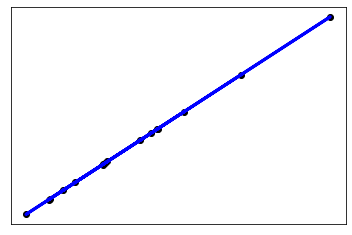

In [ ]:
# Plot outputs
plt.scatter(y_test, y_pred, color='black')
plt.plot(y_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

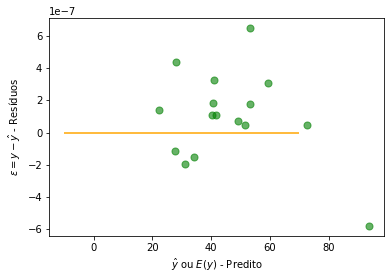

In [ ]:
res = y_test-y_pred
plt.scatter(y=res, x=y_pred, color='green', s=50, alpha=.6)
plt.hlines(y=0, xmin=-10, xmax=70, color='orange')
plt.ylabel('$\epsilon = y - \hat{y}$ - Resíduos')
plt.xlabel('$\hat{y}$ ou $E(y)$ - Predito')
plt.show()

coef_:  [[-2.23e-01  3.27e+00 -1.69e+00 -5.45e-02  3.44e+00  1.09e+00 -7.25e-01
  -3.40e-02 -5.12e-02 -4.75e-08 -5.99e-07  1.22e-08]]
erro quadrático médio:  rating    1.168574e-13
dtype: float64
score:  0.9999999999999993
mse:  rating    1.168574e-13
dtype: float64


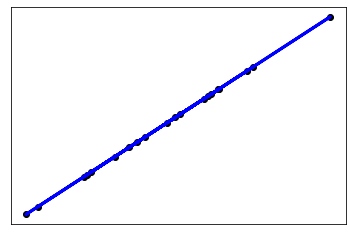

In [ ]:
# https://imasters.com.br/back-end/data-science-regressoes-com-python
# https://www.kaggle.com/marilivb/4-regress-o-linear

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
  
# carregamos os datasets
dados = pd.read_csv("/content/Ciencia-e-Visualizacao-de-Dados-em-Saude/DataSet/home-master/data/zombie/raw/zombie-meals.csv")

variaveis1 = ['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cuts']
variaveis2 = ['rating']

X = dados[variaveis1].fillna(-1)
y = dados[variaveis2].fillna(-1)
 
# dividimos a base de dados entre treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y)
  
# aplicamos o modelo de regressão linear usando LinearRegression()
modelo = linear_model.LinearRegression()
  
# treinamos o modelo usando os dados de treinamento
modelo.fit(x_train, y_train)

pred = modelo.predict(x_test)

# coeficientes...
print("coef_: ", modelo.coef_)
  
# erro quadrático médio
print("erro quadrático médio: ", np.mean((modelo.predict(x_test) - y_test) ** 2))

# variância
print("score: ", modelo.score(x_test, y_test))

# mse
mse = np.mean((pred - y_test)**2)
print("mse: ", mse)
  
# plotamos os resultados definindo algumas características do gráfico
plt.scatter(modelo.predict(x_test), y_test,  color='black')
plt.plot(y_test, modelo.predict(x_test), color='blue', linewidth=3)
  
plt.xticks(())
plt.yticks(())
  
plt.show()

## RandomForestRegressor

In [ ]:
# https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

### todos os features

In [ ]:
df = pd.read_csv("/content/Ciencia-e-Visualizacao-de-Dados-em-Saude/DataSet/home-master/data/zombie/raw/zombie-meals.csv")
dados = df.copy()

# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(dados)

# Use numpy to convert to arrays
import numpy as np
labels = np.array(features['rating'])
# axis 1 refers to the columns
features = features.drop('rating', axis = 1)
feature_list = list(features.columns)# Convert to numpy array
features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(x_train, y_train);

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

Mean Absolute Error: 4.56 degrees.
Accuracy: 85.67 %.


### rating,fat,sodium,fiber,sugars

In [ ]:
df = pd.read_csv("/content/Ciencia-e-Visualizacao-de-Dados-em-Saude/DataSet/home-master/data/zombie/raw/zombie-meals.csv")

dados = pd.DataFrame()
dados['rating'] = df['rating']
dados['fat'] = df['fat']
dados['sodium'] = df['sodium']
dados['fiber'] = df['fiber']
dados['sugars'] = df['sugars']

# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(dados)

# Use numpy to convert to arrays
import numpy as np
labels = np.array(features['rating'])
# axis 1 refers to the columns
features = features.drop('rating', axis = 1)
feature_list = list(features.columns)# Convert to numpy array
features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(x_train, y_train);

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

Mean Absolute Error: 5.21 degrees.
Accuracy: 84.38 %.


In [ ]:
y_pred = rf.predict(x_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.213272810623499
Mean Squared Error: 41.4029120659709
Root Mean Squared Error: 6.434509465838938


coef_:  [[-3.19 -0.06  2.85 -1.91]]
erro quadrático médio:  rating    15.681788
dtype: float64
score:  0.9001235871390227
mse:  rating    15.681788
dtype: float64


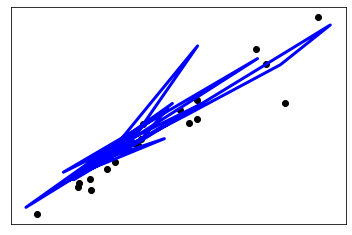

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
  
# carregamos os datasets
dados = pd.read_csv("/content/Ciencia-e-Visualizacao-de-Dados-em-Saude/DataSet/home-master/data/zombie/raw/zombie-meals.csv")

variaveis1 = ['fat','sodium','fiber','sugars']
variaveis2 = ['rating']

X = dados[variaveis1].fillna(-1)
y = dados[variaveis2].fillna(-1)
 
# dividimos a base de dados entre treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y)
  
# aplicamos o modelo de regressão linear usando LinearRegression()
modelo = linear_model.LinearRegression()
  
# treinamos o modelo usando os dados de treinamento
modelo.fit(x_train, y_train)

pred = modelo.predict(x_test)

# coeficientes...
print("coef_: ", modelo.coef_)
  
# erro quadrático médio
print("erro quadrático médio: ", np.mean((modelo.predict(x_test) - y_test) ** 2))

# variância
print("score: ", modelo.score(x_test, y_test))

# mse
mse = np.mean((pred - y_test)**2)
print("mse: ", mse)
  
# plotamos os resultados definindo algumas características do gráfico
plt.scatter(modelo.predict(x_test), y_test,  color='black')
plt.plot(y_test, modelo.predict(x_test), color='blue', linewidth=3)
  
plt.xticks(())
plt.yticks(())
  
plt.show()

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb  9 17:09:56 2021
 
@author: rafaeldontalgoncalez
"""
 
######################################
# Importando as libraries
######################################
 
import pandas as pd
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import numpy as np
 
 
######################################
# Importa o dataset
######################################
 
 
dataset = pd.read_csv("/content/Ciencia-e-Visualizacao-de-Dados-em-Saude/DataSet/home-master/data/zombie/raw/zombie-meals.csv")
dataset = dataset.dropna()
X = dataset.iloc[:, :-2]
y = dataset.iloc[:, -1].values
 
######################################
# Codificando variaveis Dummy
######################################
X_dummies = pd.get_dummies(X)
 
######################################
# Separar dados em Treino e Teste
######################################
 
X_train, X_test, y_train, y_test = ms.train_test_split(X_dummies, y, test_size = 1/5, random_state = 0)
 
 
######################################
# Treinando o modelo
######################################
 
regressor = lm.LinearRegression()
regressor.fit(X_train, y_train)
 
######################################
# Previsao
######################################
 
y_pred = regressor.predict(X_test)
 
np.set_printoptions(precision=2)
result = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
 
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df
 
X_reverse = undummify(X_test)
 
X_reverse = X_reverse.reset_index(drop=True)
 
y_compare = pd.DataFrame(result)
y_compare = y_compare.rename(index=str, columns={0:'y_pred', 1:'y_test'})
y_compare = y_compare.reset_index(drop=True)
 
resultado_final = pd.concat([y_compare, X_reverse], axis=1)
resultado_final

,y_pred,y_test,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,name,mfr,type
0,30.103646,29.924285,120,2,1,190,0.0,15.0,9,40,25,2,1.00,Jukkucress Cake,K,C
1,49.790190,49.787445,100,3,1,230,3.0,17.0,3,115,25,1,1.00,River Curry of Trifle,R,C
2,39.820659,39.703400,100,3,2,140,2.5,10.5,8,140,25,3,1.00,Zezudnut Bonbons,G,C
3,60.892614,60.756112,50,1,0,0,0.0,13.0,0,15,0,3,0.50,Cave Hazelnut Delight,Q,C
4,45.752749,45.811716,120,3,3,75,3.0,13.0,4,100,25,3,1.00,River Lemon Sorbet,P,C
5,58.139171,58.345141,100,3,0,0,3.0,14.0,7,100,25,2,1.00,Drake Sundae,K,C
6,59.357405,59.363993,90,2,0,15,3.0,15.0,5,90,25,2,1.00,Slissiatine Bread,N,C
7,53.049718,53.371007,110,3,0,170,3.0,17.0,3,90,25,3,1.00,Pressure-Fried Fire Leopard,P,C
8,34.101321,34.139765,150,4,3,150,3.0,16.0,11,170,25,3,1.00,Ice Lime-Coated Bread,R,C
9,38.892091,38.839746,110,2,1,200,0.0,21.0,3,35,100,3,1.00,Opeadarin Buns,G,C


## Sequential

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

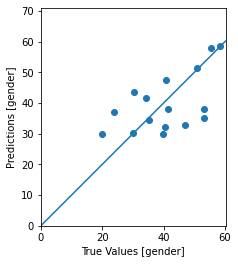

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

model = build_model()

history = model.fit(
  X_train, y_train,
  epochs=50, validation_split = 0.2, verbose=0)

test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [gender]')
plt.ylabel('Predictions [gender]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} gender".format(mae))

1/1 - 0s - loss: 93.4165 - mae: 7.7462 - mse: 93.4165
Testing set Mean Abs Error:  7.75 gender


# Análise 3 - Regressão Logística: zombies-survey.csv

In [40]:
df = pd.read_csv("/content/Ciencia-e-Visualizacao-de-Dados-em-Saude/DataSet/home-master/data/zombie/raw/zombies-survey.csv")
df.head()

,name,type,gender,height,weight,gbc,gs,pbc,sp
0,Lossack Slossir,biological,male,73.847017,241.893563,0.8,14,5.1,3.5
1,Hasp Talch,biological,male,68.781904,162.310473,0.8,14,4.9,3.0
2,Lesprash Rindrad,biological,male,74.110105,212.740856,0.8,13,4.7,3.2
3,Halceff Gock,biological,male,71.730978,220.042470,0.8,15,4.6,3.1
4,Moddeche Splud,biological,male,69.881796,206.349801,0.8,14,5.0,3.6


## Correlação

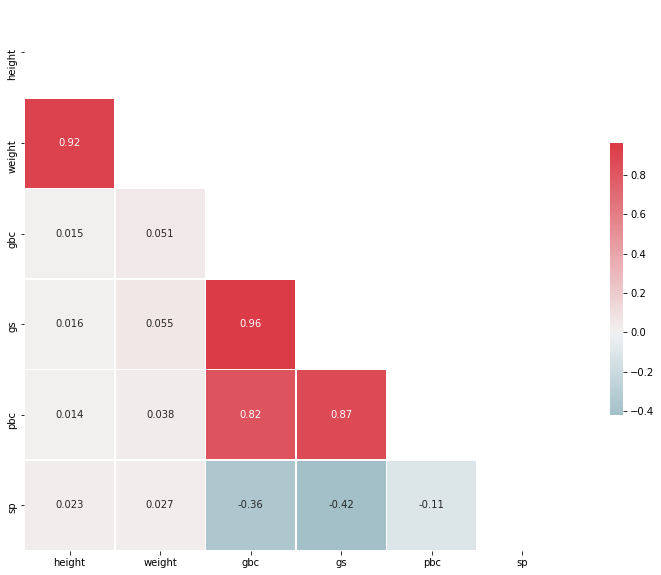

In [ ]:
import seaborn as sns

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [41]:
# Transforma classe em categorico
#df['gender'] = df['gender'].astype('category')
df['gender'] = df['gender'].map(transformar_sexo)

In [45]:
print ('Médias das Amostras')
m1= df.groupby('gender').mean()
print (m1)

print ('Desvio Padrão das Amostras')
sd1 = df.groupby('gender').std()
print (sd1)

Médias das Amostras
           height      weight       gbc         gs       pbc        sp
gender                                                                
0       69.140878  186.433917  4.848000  38.040000  5.872000  3.061333
1       63.374851  132.920250  4.741333  37.133333  5.814667  3.046667
Desvio Padrão das Amostras
          height     weight       gbc         gs       pbc        sp
gender                                                              
0       2.578503  19.690065  3.078055  18.149857  0.856858  0.468434
1       2.774642  19.063971  3.046801  17.233949  0.802983  0.398759


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.glm(formula='gender ~ height + weight + gbc + gs + pbc + sp', data=df, family = sm.families.Binomial()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 gender   No. Observations:                  150
Model:                            GLM   Df Residuals:                      143
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24.228
Date:                Thu, 13 May 2021   Deviance:                       48.457
Time:                        07:25:57   Pearson chi2:                     91.3
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4321     16.266      2.240      0.0

In [ ]:
print(np.exp(modelo.params[1:]))

height    0.995825
weight    0.819858
gbc       1.097455
gs        1.031494
pbc       0.309945
sp        1.181667
dtype: float64


In [ ]:
(np.exp(modelo.params[1:]) - 1) * 100

height    -0.417535
weight   -18.014234
gbc        9.745537
gs         3.149436
pbc      -69.005545
sp        18.166661
dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression

# Agora vamos fazer com sklearn para aproveitar as métricas
model = LogisticRegression(penalty='none', solver='newton-cg')
baseline_df = df[['gender','height','weight','gbc','gs','pbc','sp']].dropna()
y = baseline_df.gender
X = pd.get_dummies(baseline_df[['height','weight','gbc','gs','pbc','sp']], drop_first=True)
print(X)

        height      weight  gbc  gs  pbc   sp
0    73.847017  241.893563  0.8  14  5.1  3.5
1    68.781904  162.310473  0.8  14  4.9  3.0
2    74.110105  212.740856  0.8  13  4.7  3.2
3    71.730978  220.042470  0.8  15  4.6  3.1
4    69.881796  206.349801  0.8  14  5.0  3.6
..         ...         ...  ...  ..  ...  ...
145  59.667849  126.355256  9.2  52  6.7  3.0
146  64.089406  134.211017  7.6  50  6.3  2.5
147  60.578063  118.242812  8.0  52  6.5  3.0
148  62.114866  145.337359  9.2  54  6.2  3.4
149  56.159458   90.815256  7.2  51  5.9  3.0

[150 rows x 6 columns]


In [ ]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

print(model.coef_)

# Predizendo as probabilidades
yhat = model.predict_proba(X)

yhat = yhat[:, 1]

[[-0.00418036 -0.19862442  0.09299256  0.03100887 -1.17135873  0.16693174]]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, model.predict(X))

array([[70,  5],
       [ 5, 70]])

In [ ]:
pd.crosstab(y, model.predict(X))

col_0,0,1
gender,,
0,70,5
1,5,70


In [ ]:
acuracia = accuracy_score(y, model.predict(X))
print('O modelo obteve %0.4f de acurácia.' % acuracia)

O modelo obteve 0.9333 de acurácia.


In [ ]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        75
           1       0.93      0.93      0.93        75

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix, auc

print('AUC: %0.2f' % roc_auc_score(y, yhat))

AUC: 0.98


In [ ]:
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
df.head(30)

,name,type,gender,height,weight,gbc,gs,pbc,sp
0,Lossack Slossir,biological,0,73.847017,241.893563,0.8,14,5.1,3.5
1,Hasp Talch,biological,0,68.781904,162.310473,0.8,14,4.9,3.0
2,Lesprash Rindrad,biological,0,74.110105,212.740856,0.8,13,4.7,3.2
3,Halceff Gock,biological,0,71.730978,220.042470,0.8,15,4.6,3.1
4,Moddeche Splud,biological,0,69.881796,206.349801,0.8,14,5.0,3.6
5,Oshor Geactong,biological,0,67.253016,152.212156,1.6,17,5.4,3.9
6,Glitcolch Threbbalgo,biological,0,68.785081,183.927889,1.2,14,4.6,3.4
7,Giemmedd Ark,biological,0,68.348516,167.971110,0.8,15,5.0,3.4
8,Nesp Natho,biological,0,67.018950,175.929440,0.8,14,4.4,2.9
9,Mapmo Ondrath,biological,0,63.456494,156.399676,0.4,15,4.9,3.1


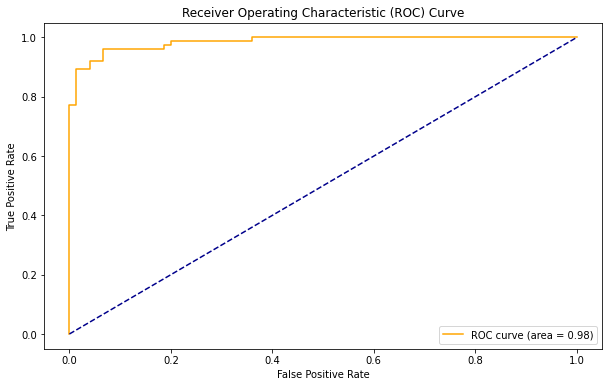

In [ ]:
from sklearn import metrics

plot_roc_curve(y, yhat)

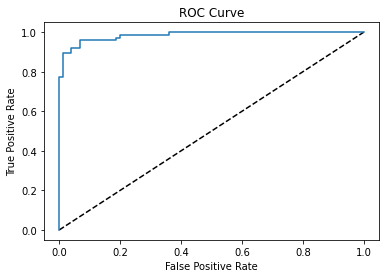

In [ ]:
# computa probabilidades
y_pred_prob = model.predict_proba(X)[:,1]

# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

# curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Predições

In [ ]:
eu = pd.DataFrame({'height':72, 'weight':220, 'gbc':0.7, 'gs':13, 'pbc':6.2, 'sp':2.1}, index=[0])
minha_prob = model.predict_proba(eu)
#print('Eu teria {}% de probabilidade de sobrevivência se estivesse no Titanic'.format(round(minha_prob[:,1][0]*100, 2)))
print('A probabilidade do dado preditado ser feminino é de {}%.'.format(round(minha_prob[:,1][0]*100, 2)))

A probabilidade do dado preditado ser feminino é de 0.0%.


In [ ]:
eu = pd.DataFrame({'height':52, 'weight':143, 'gbc':0.2, 'gs':8, 'pbc':4.3, 'sp':1.4}, index=[0])
minha_prob = model.predict_proba(eu)
#print('Eu teria {}% de probabilidade de sobrevivência se estivesse no Titanic'.format(round(minha_prob[:,1][0]*100, 2)))
print('A probabilidade do dado preditado ser feminino é de {}%.'.format(round(minha_prob[:,1][0]*100, 2)))

A probabilidade do dado preditado ser feminino é de 96.35%.


In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X, y)))

Accuracy of logistic regression classifier on test set: 0.93


In [ ]:
# Predizendo as probabilidades
y_pred = model.predict(X)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[70  5]
 [ 5 70]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        75
           1       0.93      0.93      0.93        75

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150

